In [1]:
link = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

Insights to be drawn -

    ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
    ● Get all TESLA cars with the model year, and model type made in Bothell City.
    ● Get all the cars that have an electric range of more than 100, and were made after2015
    ● Draw plots to show the distribution between city and electric vehicle type

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("D:\DataSets\Electric_Vehicle_Population_Data.csv")

In [4]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [5]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [7]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [8]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range'].reset_index()[['Make', 'Model', 'Electric Vehicle Type']]

,Make,Model,Electric Vehicle Type
0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
1,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
2,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
3,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
4,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
16441,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
16442,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV)
16443,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV)
16444,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV)


### Get all TESLA cars with the model year, and model type made in Bothell City.


In [9]:
df[(df['Make']=='TESLA') & (df['City'] == 'Bothell')].reset_index()[['Make', 'Model Year', 'Model' ]]

,Make,Model Year,Model
0,TESLA,2020,MODEL 3
1,TESLA,2022,MODEL 3
2,TESLA,2022,MODEL Y
3,TESLA,2018,MODEL 3
4,TESLA,2017,MODEL X
...,...,...,...
2402,TESLA,2019,MODEL 3
2403,TESLA,2021,MODEL 3
2404,TESLA,2014,MODEL S
2405,TESLA,2022,MODEL 3


### Get all the cars that have an electric range of more than 100, and were made after2015

In [10]:
df[(df['Electric Range']>100) & (df['Model Year']>2015)].reset_index()[['Make', 'Model']]

,Make,Model
0,TESLA,MODEL X
1,TESLA,MODEL 3
2,TESLA,MODEL S
3,TESLA,MODEL 3
4,TESLA,MODEL 3
...,...,...
34061,TESLA,MODEL Y
34062,NISSAN,LEAF
34063,TESLA,MODEL Y
34064,TESLA,MODEL 3


### Draw plots to show the distribution between city and electric vehicle type

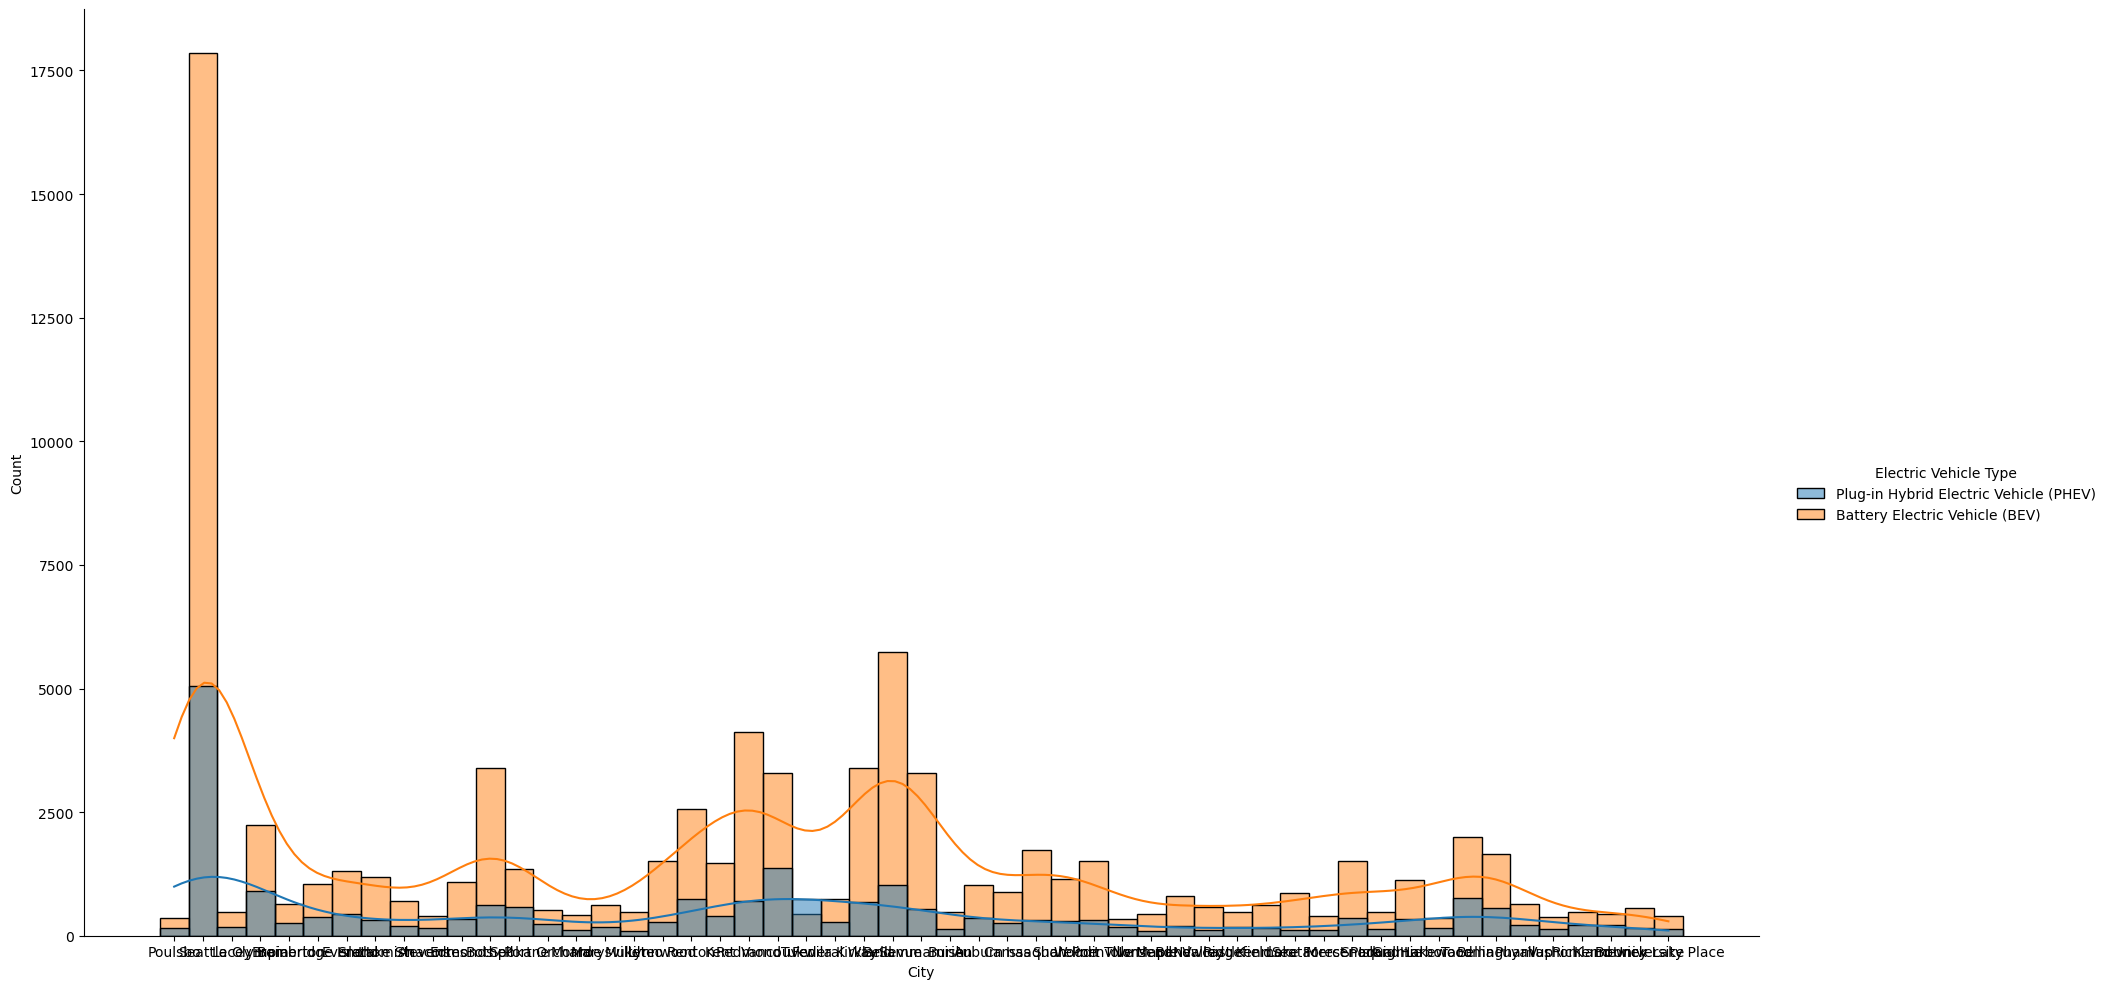

In [11]:
#Taking City values which appears atleast more than 500 times
temp_df = df.groupby('City').filter(lambda x: len(x) > 500)

sns.displot(data=temp_df, x="City", kde=True, hue="Electric Vehicle Type", height=10, aspect=1.8)